# Assignment 9

## 1. SVM (Linearly Seperable Data)

### You are given a two dimensional dataset (SVM_Q1) with 4 classes and you have to use SVM for classification.

### Import the required libraries 

In [1]:
# Imports library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.colors import ListedColormap


### The code for loading data is given below.

In [51]:
# load data (do not change it)
import numpy as np
X_train, X_test, y_train, y_test = np.load('./SVM_Q1.npy', allow_pickle=True)

**NOTE: In all the decision boundary visualization plots, the white points represent the support vectors, and the colored points represent data points of different classes, and the colored regions represent the region corresponding to a class.**

### 1.a) Write code to visualize the training data

Text(0.5, 1.0, 'Scatter plot of SVM_Q1 data')

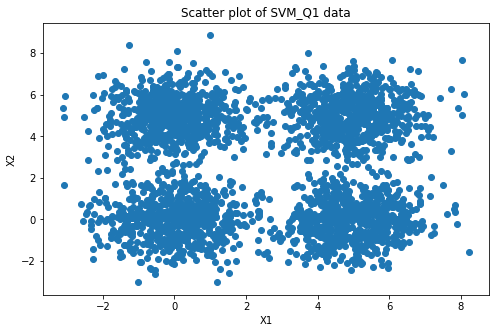

In [52]:
# Generate scatter plot for training data 
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0],X_train[:,1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatter plot of SVM_Q1 data")

### 1.b) Write the code for SVM classifier (you can write code from scratch or use sklrean)

In [53]:
# SVM classifier code -- Linear Kernel, One-vs-Rest multi-class classification
svm_clf = svm.SVC(kernel="linear")
svm_clf = svm_clf.fit(X_train,y_train)
y_train_pred =svm_clf.predict(X_train) 
y_test_pred = svm_clf.predict(X_test)

### 1.c) Generate the confusion matrix for the classifer on the test data

In [57]:
# Generate confusion matrix
print("Confusion Matrix")
conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns = ["Predicted (0)","Predicted (1)","Predicted (2)","Predicted (3)"]).rename(index={0:"Actual (0)",1:"Actual (1)",2:"Actual (2)",3:"Actual (3)"})
conf_matrix

Confusion Matrix


,Predicted (0),Predicted (1),Predicted (2),Predicted (3)
Actual (0),327,4,5,0
Actual (1),3,324,0,1
Actual (2),3,0,336,1
Actual (3),0,1,1,314


### 1.d) Visualize the support vectors and decision boundary

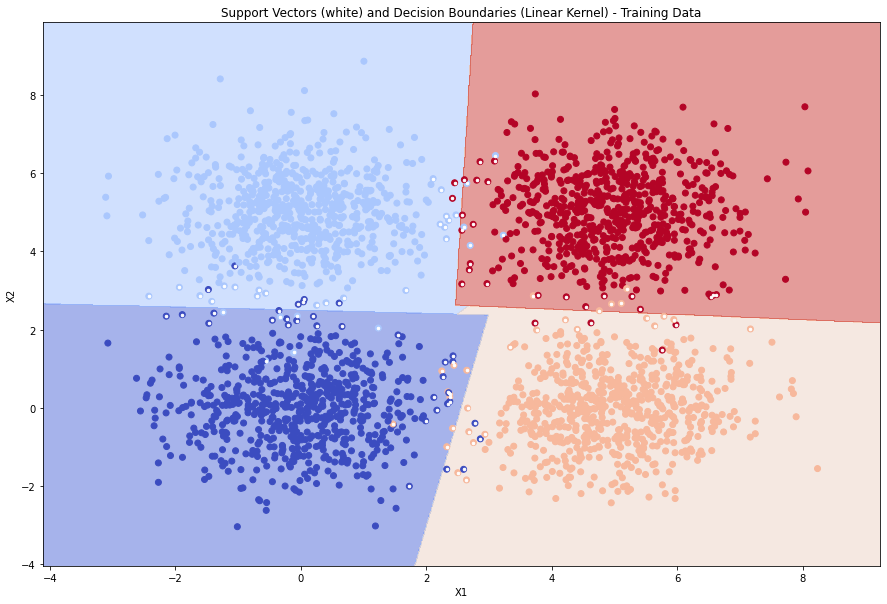

In [58]:
#Decision Boundary - Training Data
h = 0.01
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Support Vectors (white) and Decision Boundaries (Linear Kernel) - Training Data")
plt.plot(svm_clf.support_vectors_[:,0],svm_clf.support_vectors_[:,1],"o",markersize = 2.5,color = "white")

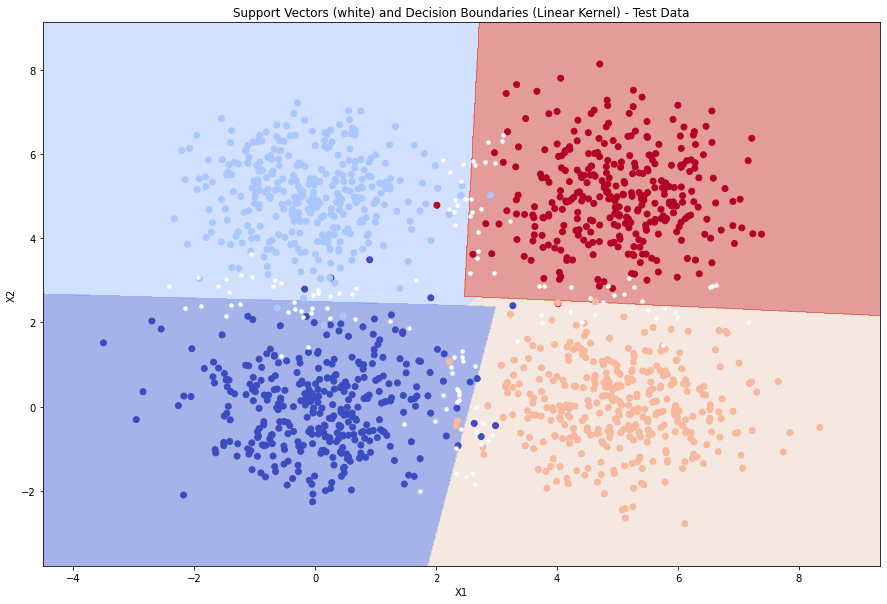

In [59]:
#Decision Boundary - Test Data
h = 0.01
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,10))

plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Support Vectors (white) and Decision Boundaries (Linear Kernel) - Test Data")
plt.plot(svm_clf.support_vectors_[:,0],svm_clf.support_vectors_[:,1],"o",markersize = 3.5,color = "white")

### 1.e) Report the accuracy obtained 

In [60]:
print("Training Accuracy = %.2f"%(svm_clf.score(X_train,y_train)*100)+"%")
print("Test Accuracy = %.2f"%(svm_clf.score(X_test,y_test)*100)+"%")

Training Accuracy = 98.47%
Test Accuracy = 98.56%


## 2. SVM (Non-linearly separable Data)

### You are given a two dimensional dataset with 2 classes as loaded below and you have to use SVM for classification.

In [2]:
# generating data (do not change it)
from sklearn.datasets import make_circles 
X, Y = make_circles(n_samples = 3000, noise = 0.04) 

### 2.a) Use train_test_split function in sklearn to split the dataset into train and test sets in the ratio of 80:20

In [3]:
#Train-Test Splitting
X_train_cir, X_test_cir, y_train_cir, y_test_cir = train_test_split(X,Y,test_size = 0.2,random_state = 42)

### 2.b) Write the code for SVM classifier with polynomial kernel (you can write code from scratch or use sklrean)

Hint: Use kernel of degree 8.

In [24]:
# SVM Polynomial Kernel - Degree 8
svm_clf = svm.SVC(kernel="poly",degree=8) #Polynomial Kernel with degree 8
svm_clf = svm_clf.fit(X_train_cir,y_train_cir)
y_train_pred =svm_clf.predict(X_train_cir) 
y_test_pred = svm_clf.predict(X_test_cir)

### 2.c) Generate the confusion matrix for the classifer on the test data

In [25]:
# Generate confusion matrix for Polynomial Kernel (Degree 8)
print("Confusion Matrix of Test Data (Polynomial)")

conf_matrix = pd.DataFrame(confusion_matrix(y_test_cir,y_test_pred),columns = ["Predicted (0)","Predicted (1)"]).rename(index={0:"Actual (0)",1:"Actual (1)"})
conf_matrix

Confusion Matrix of Test Data (Polynomial)


,Predicted (0),Predicted (1)
Actual (0),301,1
Actual (1),4,294


### 2.d) Visualize the support vectors and plot the decision boundary

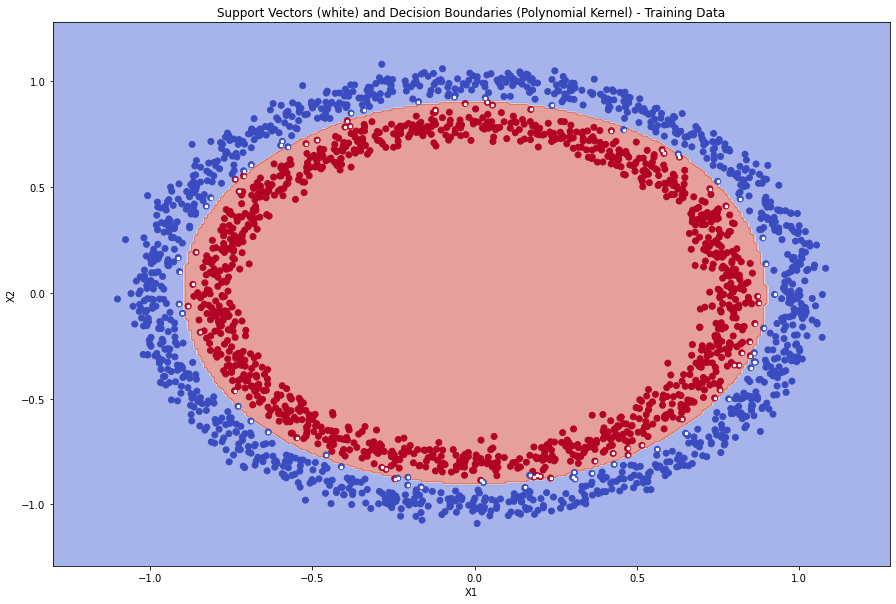

In [26]:
# Visualize support vectors
#Decision Boundary - Training Data

h = 0.01
x_min, x_max = X_train_cir[:, 0].min() - 0.2, X_train_cir[:, 0].max() + 0.2
y_min, y_max = X_train_cir[:, 1].min() - 0.2, X_train_cir[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X_train_cir[:, 0], X_train_cir[:, 1], c=y_train_cir, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Support Vectors (white) and Decision Boundaries (Polynomial Kernel) - Training Data")
plt.plot(svm_clf.support_vectors_[:,0],svm_clf.support_vectors_[:,1],"o",markersize = 2.5,color = "white")

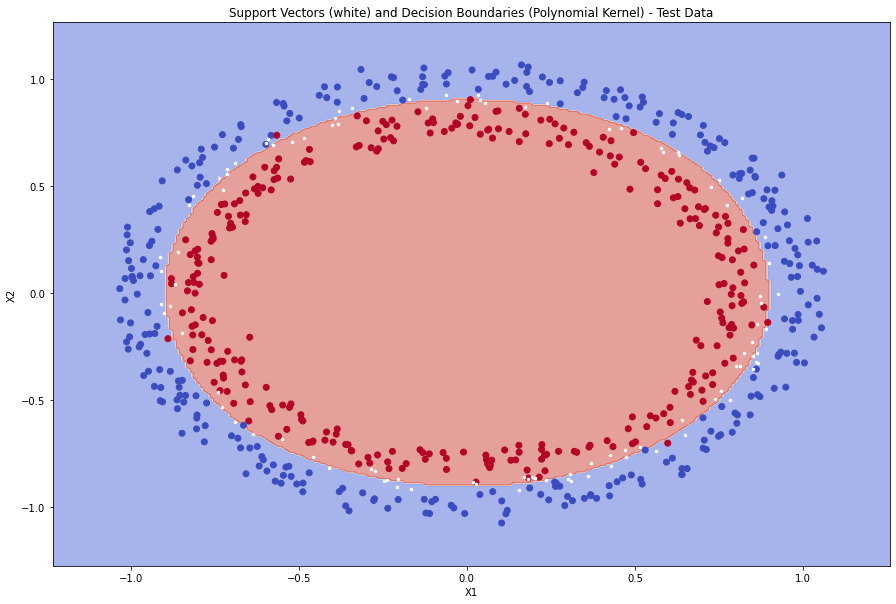

In [27]:
# Visualize support vectors and decision boundary
#Decision Boundary - Test Data

h = 0.01
x_min, x_max = X_test_cir[:, 0].min() - 0.2, X_test_cir[:, 0].max() + 0.2
y_min, y_max = X_test_cir[:, 1].min() - 0.2, X_test_cir[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X_test_cir[:, 0], X_test_cir[:, 1], c=y_test_cir, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Support Vectors (white) and Decision Boundaries (Polynomial Kernel) - Test Data")
plt.plot(svm_clf.support_vectors_[:,0],svm_clf.support_vectors_[:,1],"o",markersize = 2.5,color = "white")

### 2.e) Report the accuracy obtained 

In [32]:
# Accuracy code
print("POLYNOMIAL KERNAL - Degree 8")
print("Training Accuracy = %.2f"%(svm_clf.score(X_train_cir,y_train_cir)*100)+"%")
print("Test Accuracy = %.2f"%(svm_clf.score(X_test_cir,y_test_cir)*100)+"%")

POLYNOMIAL KERNAL - Degree 8
Training Accuracy = 99.50%
Test Accuracy = 99.17%


### 2.f) Repeat the above steps with sigmoid kernel (you can write code from scratch or use sklearn). You can tune the parameter to obtain better accuracy on test set.

In [45]:
#Hyperparameter tuning to achieve better score on Test set using Sigmoid Kernel
parameters = {'gamma':np.logspace(-1,2,5),'C':np.logspace(-2,1,5),'coef0':np.linspace(-10,10,5)}
best_score = 0
for g in parameters["gamma"]:
    for c in parameters["C"]:
        for c0 in parameters['coef0']:
            svm_clf = svm.SVC(kernel="sigmoid",gamma=g,C=c,coef0=c0)
            svm_clf.fit(X_train_cir,y_train_cir)
            score_test = svm_clf.score(X_test_cir,y_test_cir)
            if score_test>best_score:
                best_score = score_test
                best_model = svm_clf
print(best_model)

SVC(C=10.0, coef0=-5.0, gamma=3.1622776601683795, kernel='sigmoid')


In [46]:
#Predicting Test Data Classes
y_test_pred = best_model.predict(X_test_cir)

In [47]:
# Generate confusion matrix
print("Confusion Matrix of Test Data (SIGMOID)")
conf_matrix = pd.DataFrame(confusion_matrix(y_test_cir,y_test_pred),columns = ["Predicted (0)","Predicted (1)"]).rename(index={0:"Actual (0)",1:"Actual (1)"})
conf_matrix

Confusion Matrix of Test Data (SIGMOID)


,Predicted (0),Predicted (1)
Actual (0),297,5
Actual (1),3,295


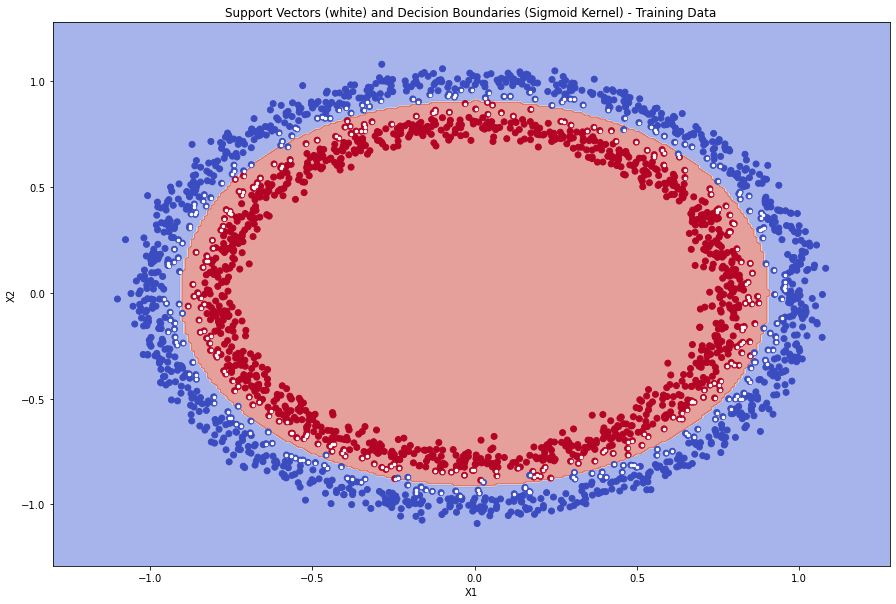

In [48]:
# Visualize support vectors - Sigmoid Kernel - Training data
h = 0.01
x_min, x_max = X_train_cir[:, 0].min() - 0.2, X_train_cir[:, 0].max() + 0.2
y_min, y_max = X_train_cir[:, 1].min() - 0.2, X_train_cir[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X_train_cir[:, 0], X_train_cir[:, 1], c=y_train_cir, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Support Vectors (white) and Decision Boundaries (Sigmoid Kernel) - Training Data")
plt.plot(best_model.support_vectors_[:,0],best_model.support_vectors_[:,1],"o",markersize = 2.5,color = "white")

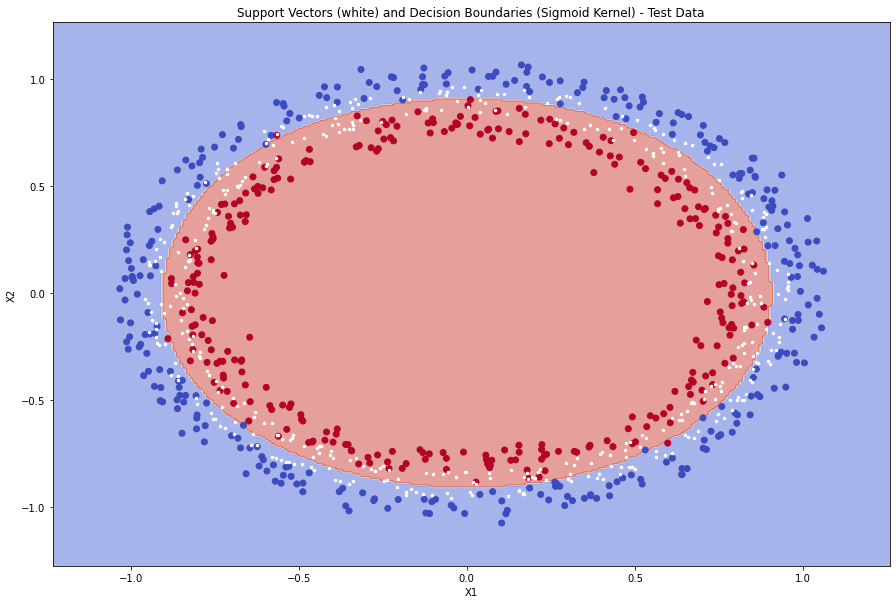

In [49]:
# Visualize support vectors - Sigmoid kernal - Test data
h = 0.01
x_min, x_max = X_test_cir[:, 0].min() - 0.2, X_test_cir[:, 0].max() + 0.2
y_min, y_max = X_test_cir[:, 1].min() - 0.2, X_test_cir[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X_test_cir[:, 0], X_test_cir[:, 1], c=y_test_cir, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Support Vectors (white) and Decision Boundaries (Sigmoid Kernel) - Test Data")
plt.plot(best_model.support_vectors_[:,0],best_model.support_vectors_[:,1],"o",markersize = 2.5,color = "white")

In [50]:
# Training and Test Accuracy - Sigmoid Kernel
# Accuracy code
print("SIGMOID KERNAL")
print("Training Accuracy = %.2f"%(best_model.score(X_train_cir,y_train_cir)*100)+"%")
print("Test Accuracy = %.2f"%(best_model.score(X_test_cir,y_test_cir)*100)+"%")

SIGMOID KERNAL
Training Accuracy = 99.38%
Test Accuracy = 98.67%


### 2.g) Reapeat the steps 2.c to 2.g with  radial basis function kernel (you can write code from scratch or use sklrean). You can tune the parameter to obtain better accuracy on test set.

In [39]:
#Hyperparameter tuning to achieve better score on Test set using RBF Kernel
parameters = {'gamma':np.logspace(-1,2,10),'C':np.logspace(-2,1,10)}
best_score = 0
for g in parameters["gamma"]:
    for c in parameters["C"]:
        svm_clf = svm.SVC(kernel="rbf",gamma=g,C=c)
        svm_clf.fit(X_train_cir,y_train_cir)
        score_test = svm_clf.score(X_test_cir,y_test_cir)
        if score_test>best_score:
            best_score = score_test
            best_model = svm_clf
print(best_model)

SVC(C=10.0, gamma=0.1)


In [40]:
#Predicting Test Data Classes
y_test_pred = best_model.predict(X_test_cir)

In [41]:
# Generate confusion matrix
print("Confusion Matrix of Test Data (RBF)")
conf_matrix = pd.DataFrame(confusion_matrix(y_test_cir,y_test_pred),columns = ["Predicted (0)","Predicted (1)"]).rename(index={0:"Actual (0)",1:"Actual (1)"})
conf_matrix

Confusion Matrix of Test Data (RBF)


,Predicted (0),Predicted (1)
Actual (0),302,0
Actual (1),4,294


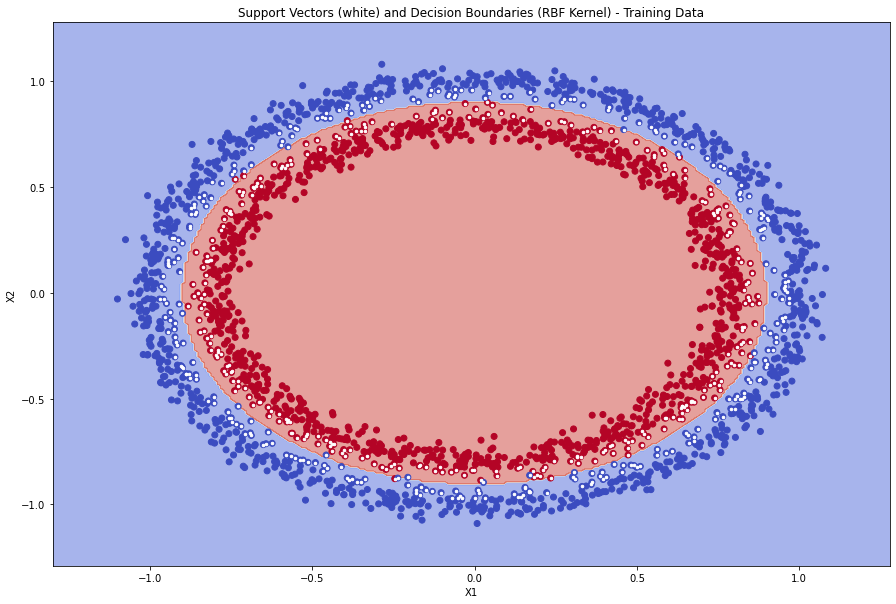

In [42]:
# Visualize support vectors (RBF) - Training Data
h = 0.01
x_min, x_max = X_train_cir[:, 0].min() - 0.2, X_train_cir[:, 0].max() + 0.2
y_min, y_max = X_train_cir[:, 1].min() - 0.2, X_train_cir[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X_train_cir[:, 0], X_train_cir[:, 1], c=y_train_cir, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Support Vectors (white) and Decision Boundaries (RBF Kernel) - Training Data")
plt.plot(best_model.support_vectors_[:,0],best_model.support_vectors_[:,1],"o",markersize = 2.5,color = "white")

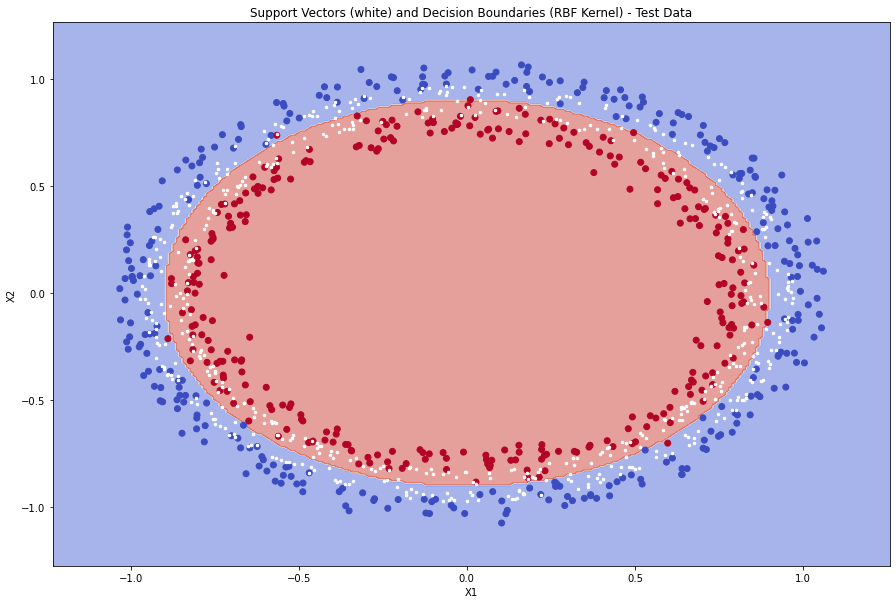

In [43]:
# Visualize support vectors (RBF) - Test data
h = 0.01
x_min, x_max = X_test_cir[:, 0].min() - 0.2, X_test_cir[:, 0].max() + 0.2
y_min, y_max = X_test_cir[:, 1].min() - 0.2, X_test_cir[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.contourf(xx,yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X_test_cir[:, 0], X_test_cir[:, 1], c=y_test_cir, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Support Vectors (white) and Decision Boundaries (RBF Kernel) - Test Data")
plt.plot(best_model.support_vectors_[:,0],best_model.support_vectors_[:,1],"o",markersize = 2.5,color = "white")

In [44]:
# Training and Test Accuracy - RBF Kernel
# Accuracy code
print("RBF KERNAL")
print("Training Accuracy = %.2f"%(best_model.score(X_train_cir,y_train_cir)*100)+"%")
print("Test Accuracy = %.2f"%(best_model.score(X_test_cir,y_test_cir)*100)+"%")

RBF KERNAL
Training Accuracy = 99.50%
Test Accuracy = 99.33%


### 2.h) For which kernal in SVM, you have obtained the highest and lowest  accuracy? What do you think the reason for it? 

The highest test accuracy was obtained with RBF kernel (99.33%), followed by Polynomial Kernel (99.17%) and Sigmoid Kernel (98.67%). Although the sigmoid kernel achieves a test accuracy that is quite close to those of RBF and polynomial, it is important to note that the accuracy value is highly sensitive to the hyperparameter choice, as most other hyperparameter combinations gave a low accuracy of around 50%.

On the other hand, the RBF and the polynomial (with higher degree) kernels are the best choices in practice, and it worked well in this case as well. The reasons are stated below:

- RBF Kernel is considered as a universal approximator, and being a radial (Gaussian) kernel, it is best suited for circular datasets like these.
- Polynomial kernel with higher degree (=8 in this case) generates complex decision function that is able to fit the circular data to near perfection.